In [1]:
import nltk
import urllib.request
import urllib.parse
import urllib.error
import ssl
import json
import pandas as pd
import re
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rishabhjain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
lemmatizer = nltk.WordNetLemmatizer()

In [4]:
def get_word_postag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    if tag.startswith('V'):
        return wordnet.VERB
    if tag.startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN

In [5]:
def normalise(word, tag):
    # Normalises words to lowercase and stems and lemmatizes it
    word = word.lower()
    postag = get_word_postag(tag)
    word = lemmatizer.lemmatize(word, postag)
    return word

In [6]:
def removePrefix(text, prefix):
    return text[len(prefix):]

In [7]:
def plot(X, Y, xlabel, ylabel, title):
    fig = plt.figure(figsize = (10,5))
    plt.bar(X, Y, tick_label=X, width=0.8, color=['red', 'blue'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    plt.subplots_adjust(bottom = 0.18)

In [8]:
def plotRelationShip(fd, prefix, title):
    data = {}
    for i in fd.keys():
        ii = removePrefix(i, prefix)
        if ii not in data.keys():
            data[ii] = fd[i]
        else:
            data[ii] += fd[i]
            
        X = []
        Y = []

        for i in data.keys():
            X.append(i)
        for i in X:
            Y.append(data[i])

            # Plotting a bar graph for recorded data
        xlabel = 'Category/Supersense'
        ylabel = 'Frequency'
        plot(X, Y, xlabel, ylabel, title)

In [9]:
def extractNounVerb(wordList):
    tagged = nltk.pos_tag(wordList)
    nouns = set()
    verbs = set()
    for word, tag in tagged:
        word = normalise(word, tag)
        if tag.startswith('N'):
            nouns.add(word)
        if tag.startswith('V'):
            verbs.add(word)
    return list(nouns), list(verbs)


In [10]:
def plotNoun(nouns, title):
    lst = []
    for word in nouns:
        syn = wordnet.synsets(word, pos=wordnet.NOUN)
        if len(syn) > 0:
            lst.append(syn[0].lexname())
    plotRelationShip(FreqDist(lst), 'noun.', title)

In [11]:
def plotVerb(verbs, title):
    lst = []
    for word in verbs1:
        syn = wordnet.synsets(word, pos=wordnet.VERB)
        if len(syn) > 0:
            lst.append(syn[0].lexname())
    plotRelationShip(FreqDist(lst), 'verb.', title)

In [12]:
def importData(site):
    print('Downloading books')
    print('Extracting ', site)
    uh1 = urllib.request.urlopen(site)
    data = uh1.read().decode('utf8')
    return data

In [13]:
def preProcessing(data):
    data = data.lower()
    data = re.sub('^Section [1-9].', '', data)
    data = re.sub(r'==.*?==+', '', data)
    data = re.sub(r'CHAPTER \d+', '', data)
    data = re.sub('[\(\[].*?[\)\]]', '', data)
    data = re.sub(r'[^a-zA-Z0-9\s]', '', data)
    data = data.replace('\n', '')
    return data


In [14]:
# Importing data
data1 = importData('http://www.gutenberg.org/files/1342/1342-0.txt')
data2 = importData('http://www.gutenberg.org/files/829/829-0.txt')
# Preprocessing
print('Preprocessing texts')
data1 = preProcessing(data1)
data2 = preProcessing(data2)

Extracting  http://www.gutenberg.org/files/1342/1342-0.txt
Extracting  http://www.gutenberg.org/files/829/829-0.txt
Preprocessing texts


In [15]:
print('Tokenizing the texts of the books')
token1 = nltk.word_tokenize(data1)
token2 = nltk.word_tokenize(data2)
print('Tokenizing done')

Tokenizing the texts of the books
Tokenizing done


In [16]:
print('Removing stopwords')
stop_words = set(stopwords.words('english'))

Removing stopwords


In [17]:
word_list1 = []
for w in token1:
    if not w in stop_words:
        word_list1.append(w)

word_list2 = []
for w in token2:
    if not w in stop_words:
        word_list2.append(w)

print('Stopwords removed')

Stopwords removed


In [18]:
print('Extracting nouns and verbs using POS tagging')
nouns1, verbs1 = extractNounVerb(word_list1)
nouns2, verbs2 = extractNounVerb(word_list2)

print('All nouns and verbs extracted')

Extracting nouns and verbs using POS tagging
All nouns and verbs extracted


Finding the category of each noun and verb using wordnet and plotting frequency distribution
Plot for nouns of book-1:


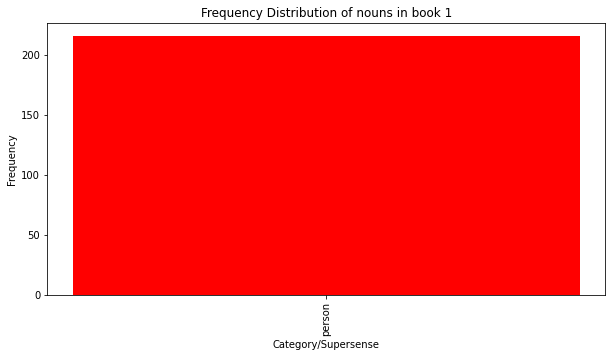

<Figure size 432x288 with 0 Axes>

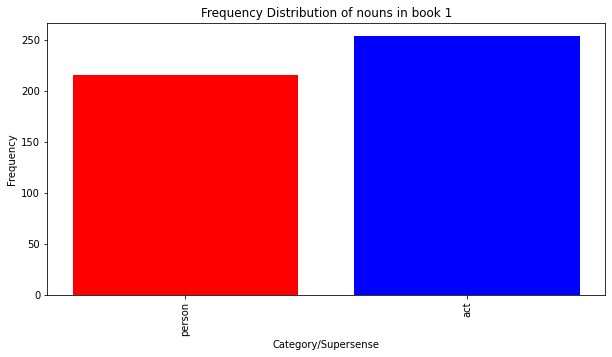

<Figure size 432x288 with 0 Axes>

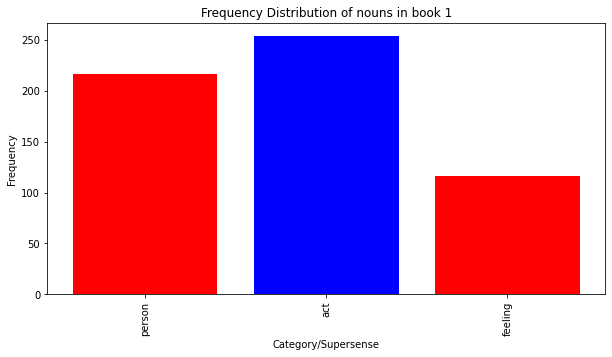

<Figure size 432x288 with 0 Axes>

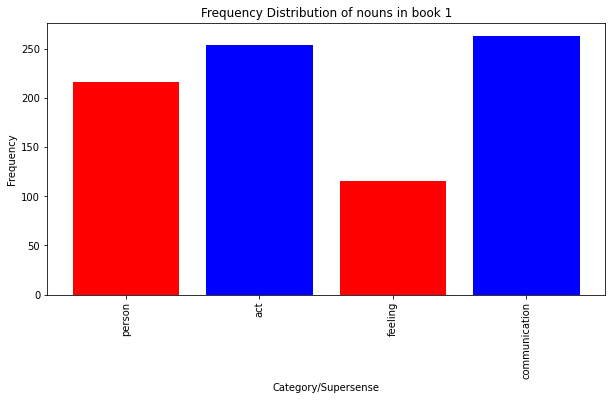

<Figure size 432x288 with 0 Axes>

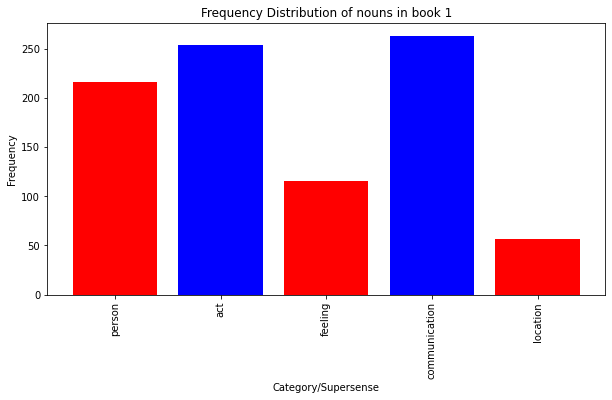

<Figure size 432x288 with 0 Axes>

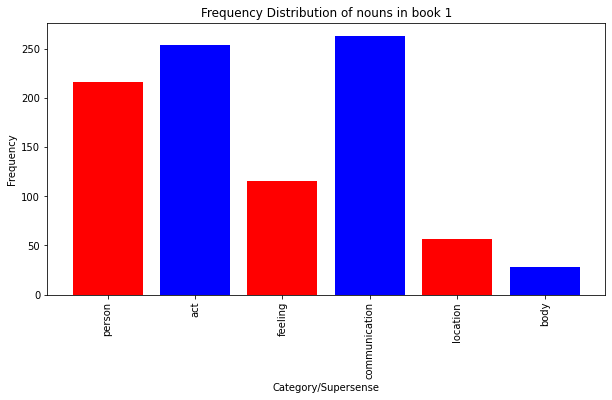

<Figure size 432x288 with 0 Axes>

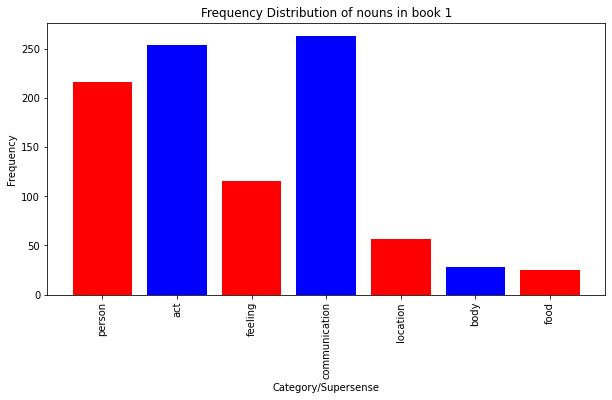

<Figure size 432x288 with 0 Axes>

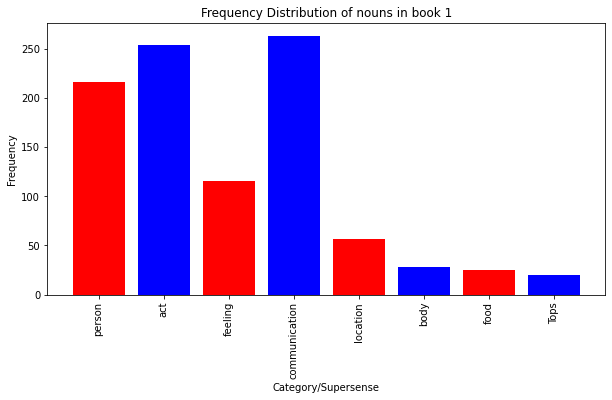

<Figure size 432x288 with 0 Axes>

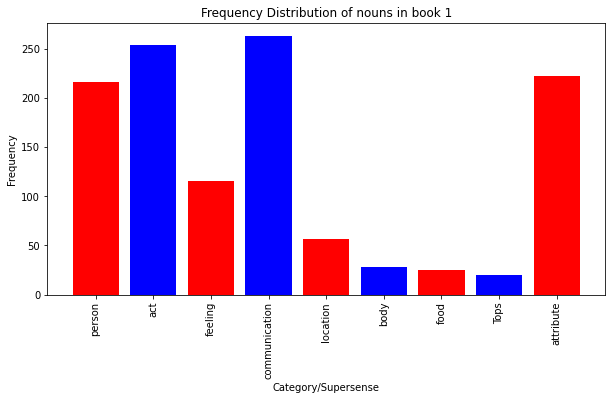

<Figure size 432x288 with 0 Axes>

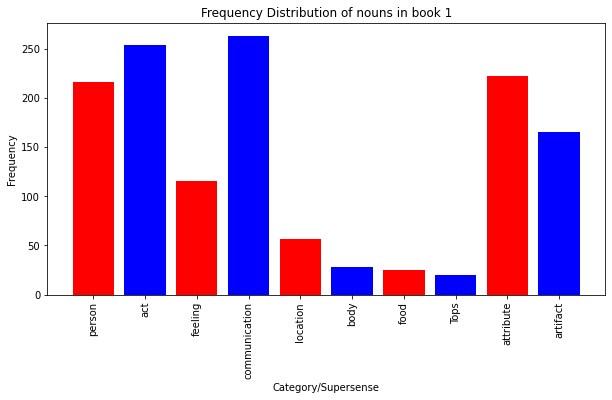

<Figure size 432x288 with 0 Axes>

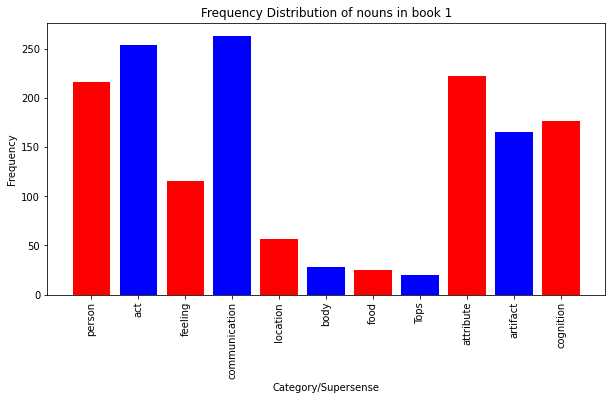

<Figure size 432x288 with 0 Axes>

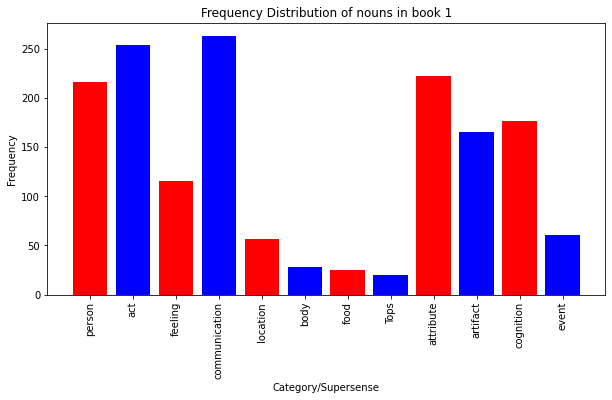

<Figure size 432x288 with 0 Axes>

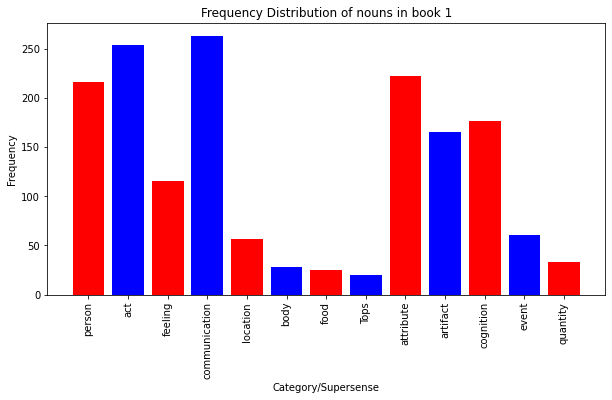

<Figure size 432x288 with 0 Axes>

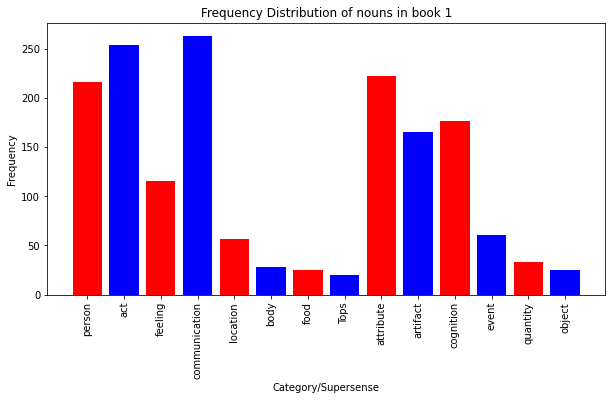

<Figure size 432x288 with 0 Axes>

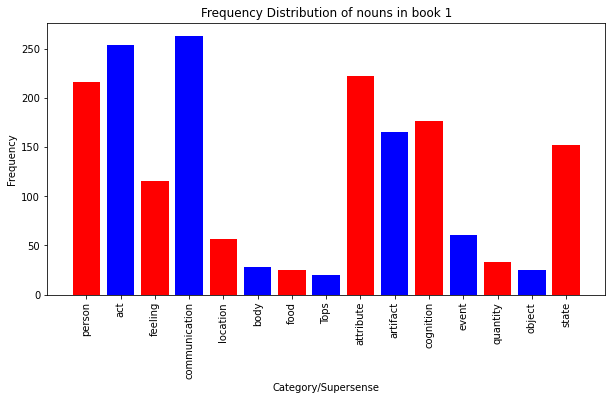

<Figure size 432x288 with 0 Axes>

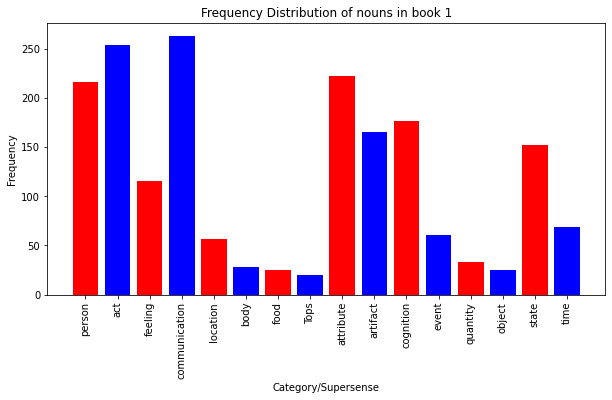

<Figure size 432x288 with 0 Axes>

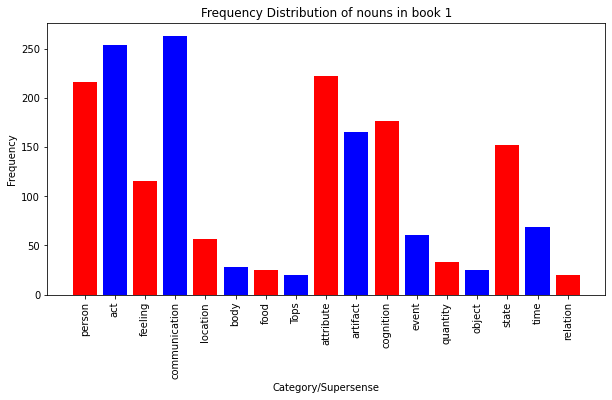

<Figure size 432x288 with 0 Axes>

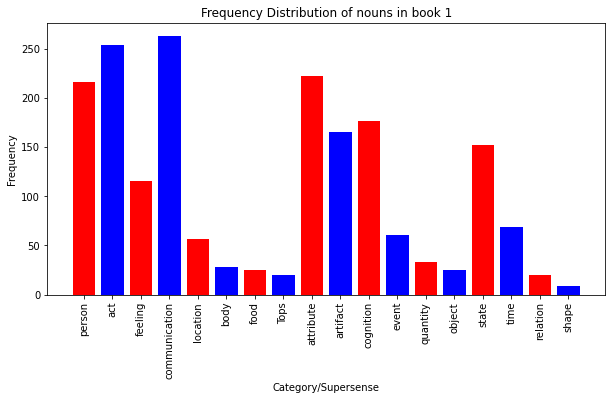

<Figure size 432x288 with 0 Axes>

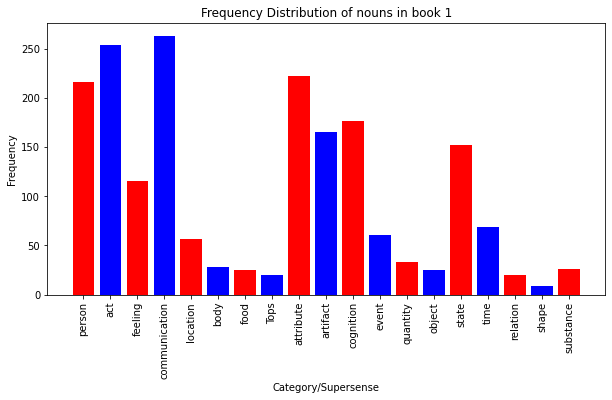

<Figure size 432x288 with 0 Axes>

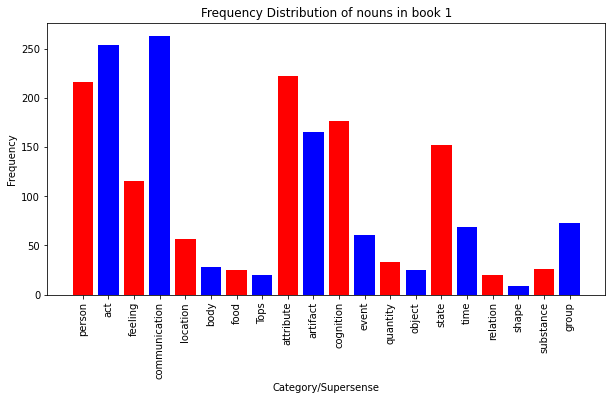

<Figure size 432x288 with 0 Axes>

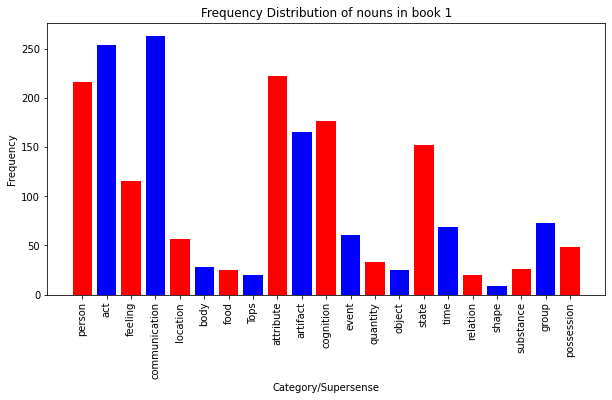

<Figure size 432x288 with 0 Axes>

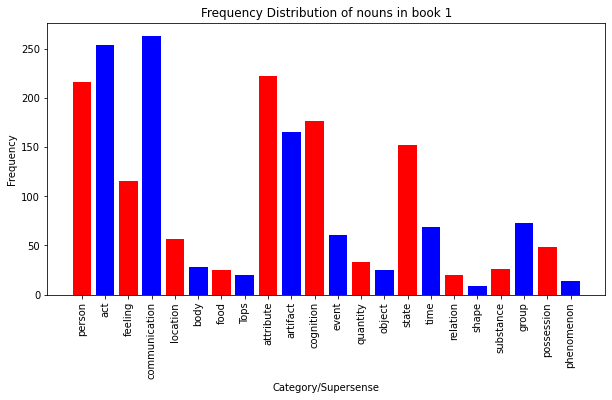

<Figure size 432x288 with 0 Axes>

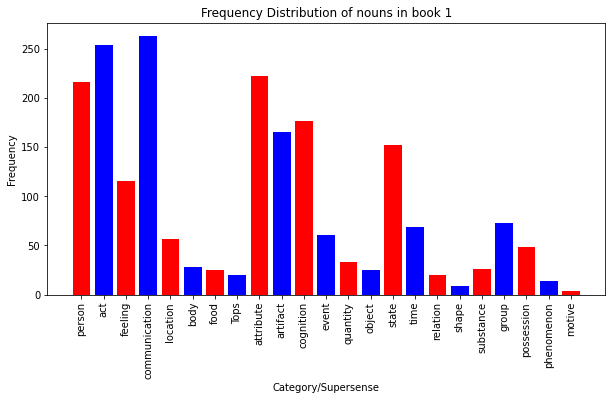

<Figure size 432x288 with 0 Axes>

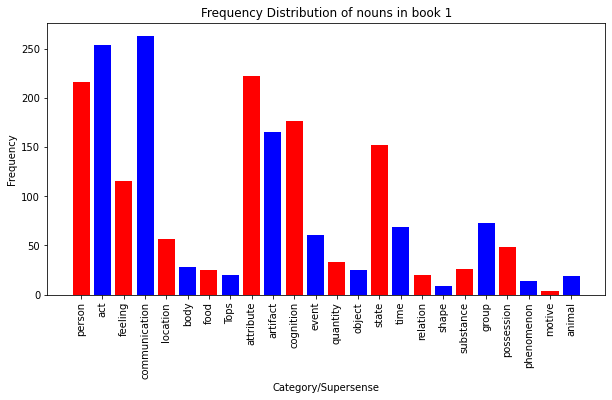

<Figure size 432x288 with 0 Axes>

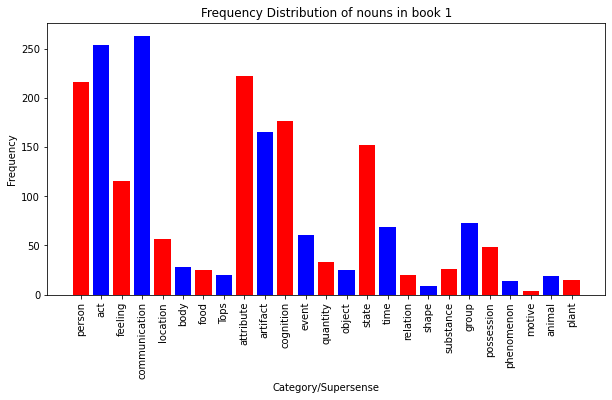

<Figure size 432x288 with 0 Axes>

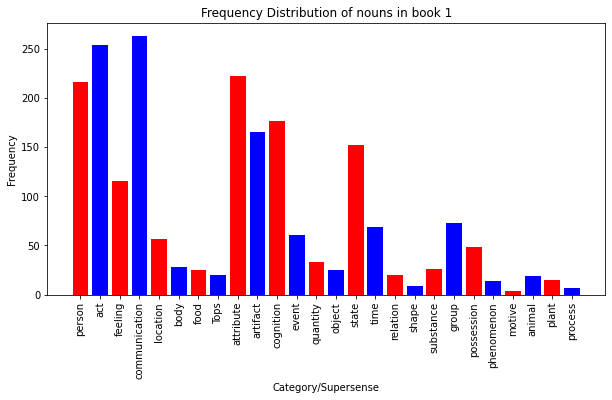

Plot for verbs of book-1:


<Figure size 432x288 with 0 Axes>

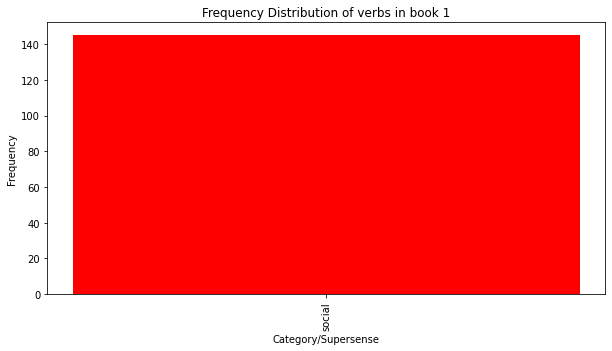

<Figure size 432x288 with 0 Axes>

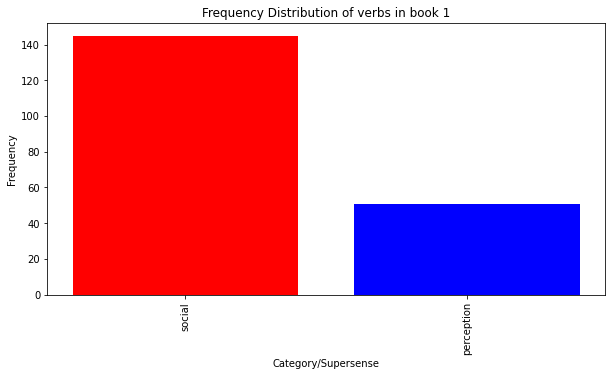

<Figure size 432x288 with 0 Axes>

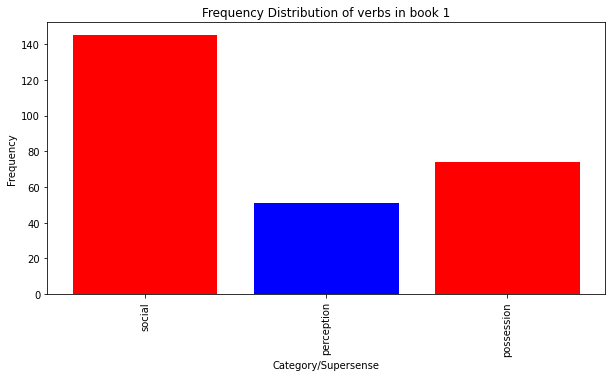

<Figure size 432x288 with 0 Axes>

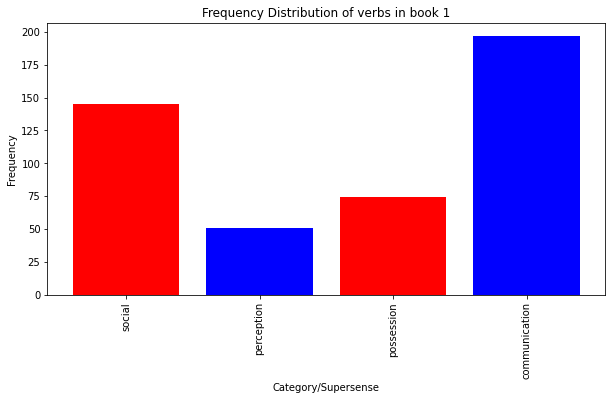

<Figure size 432x288 with 0 Axes>

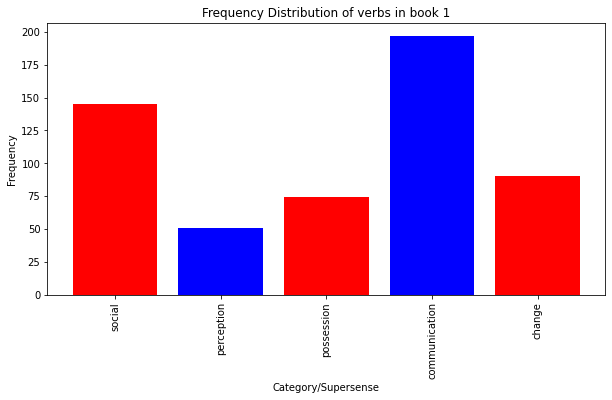

<Figure size 432x288 with 0 Axes>

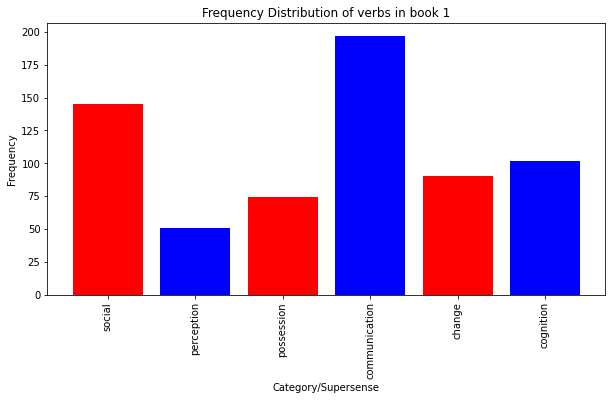

<Figure size 432x288 with 0 Axes>

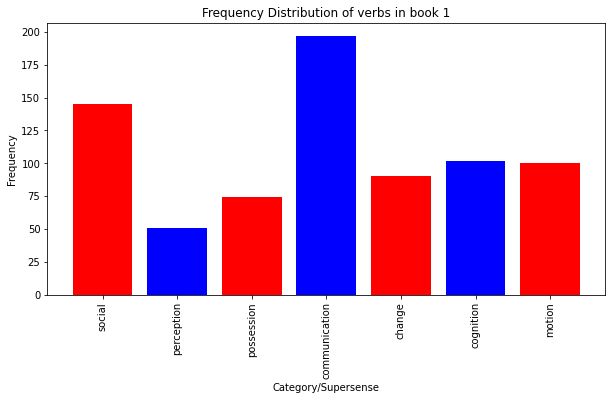

<Figure size 432x288 with 0 Axes>

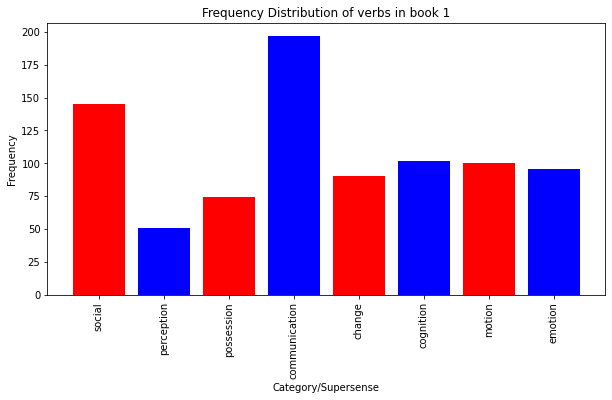

<Figure size 432x288 with 0 Axes>

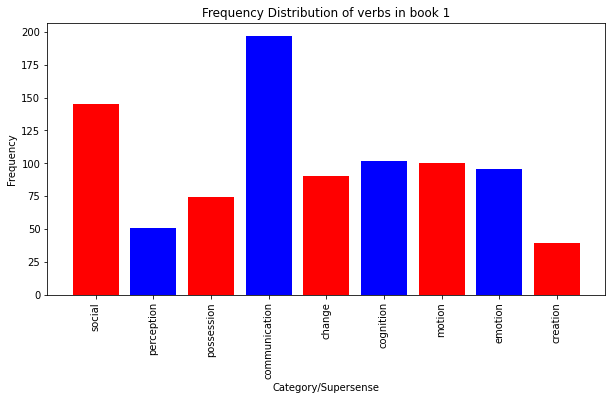

<Figure size 432x288 with 0 Axes>

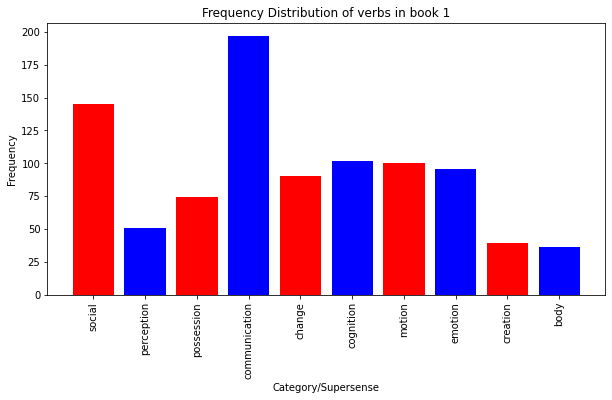

<Figure size 432x288 with 0 Axes>

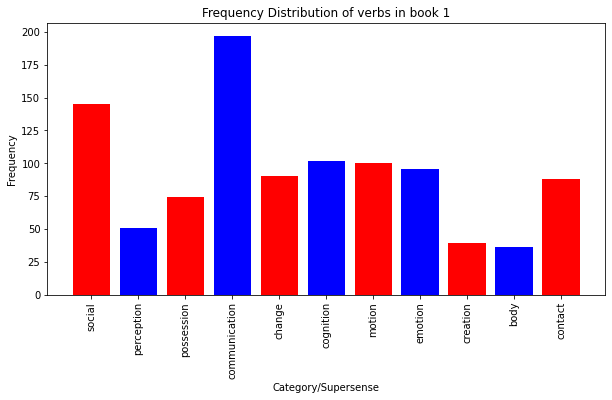

<Figure size 432x288 with 0 Axes>

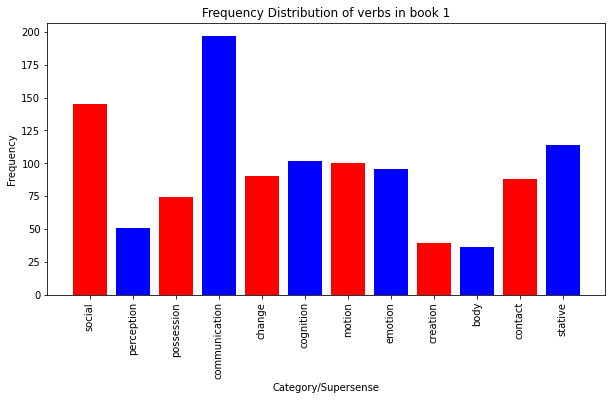

<Figure size 432x288 with 0 Axes>

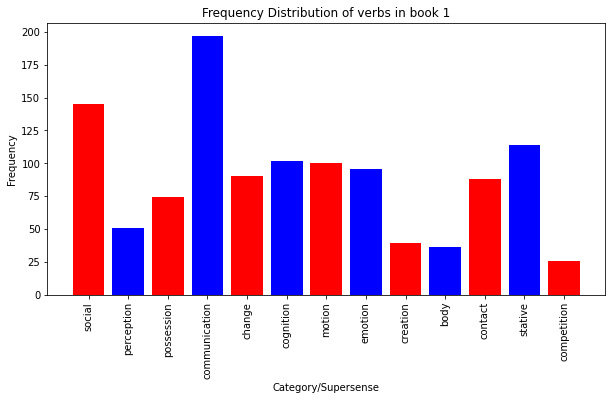

<Figure size 432x288 with 0 Axes>

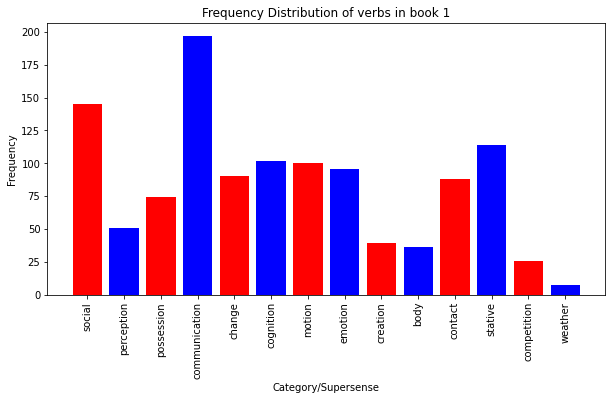

<Figure size 432x288 with 0 Axes>

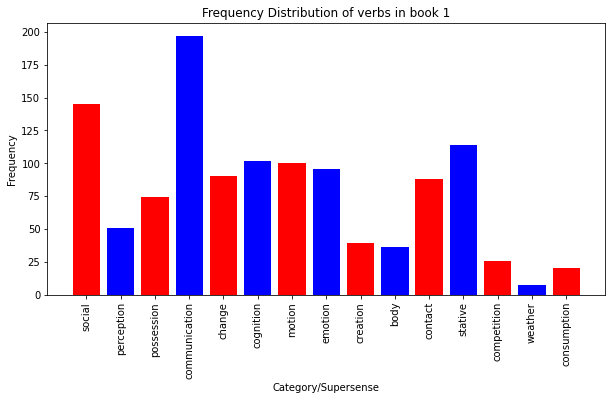

Plot for nouns of book-2:


<Figure size 432x288 with 0 Axes>

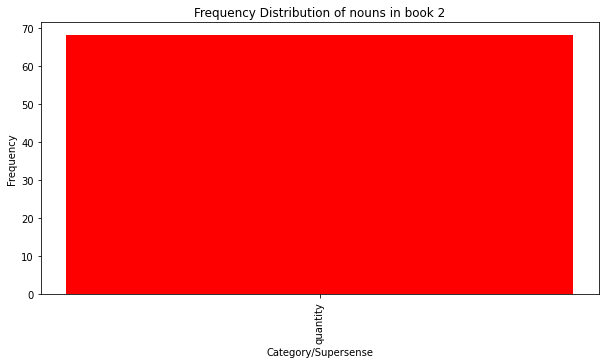

<Figure size 432x288 with 0 Axes>

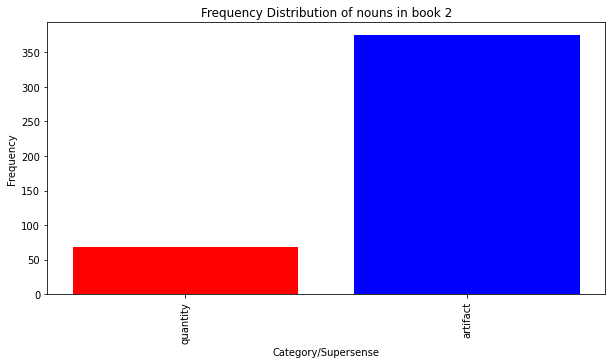

<Figure size 432x288 with 0 Axes>

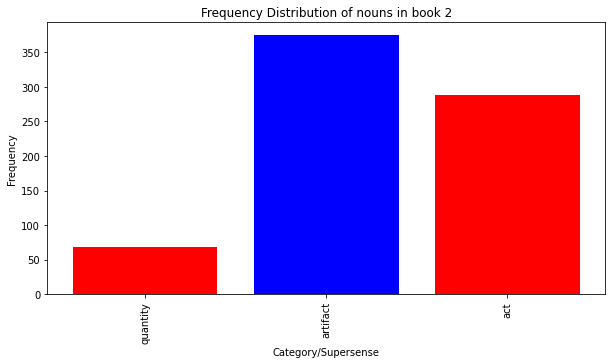

<Figure size 432x288 with 0 Axes>

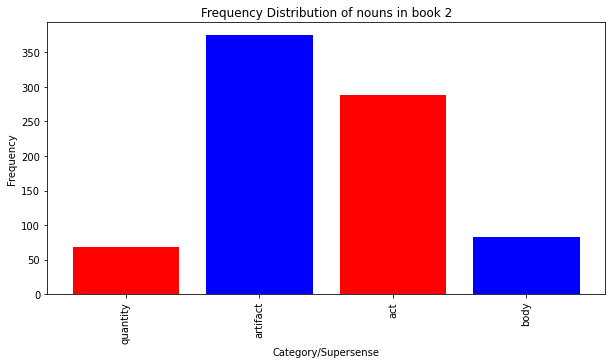

<Figure size 432x288 with 0 Axes>

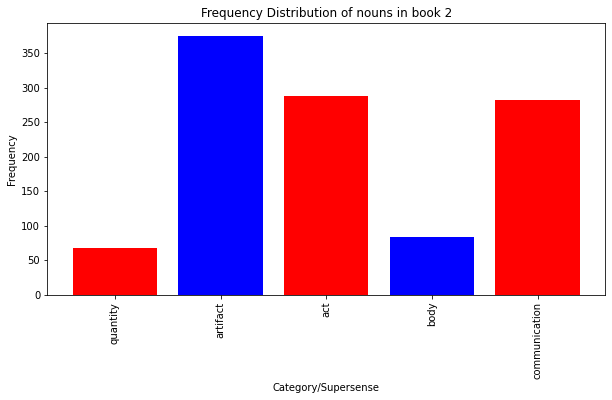

<Figure size 432x288 with 0 Axes>

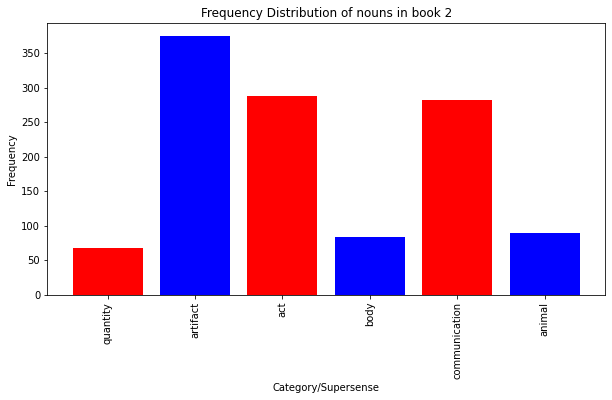

<Figure size 432x288 with 0 Axes>

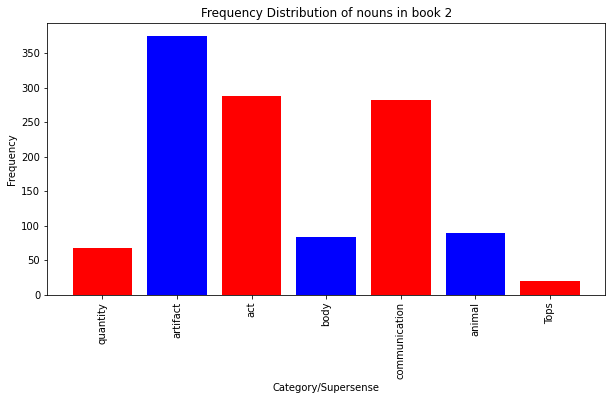

<Figure size 432x288 with 0 Axes>

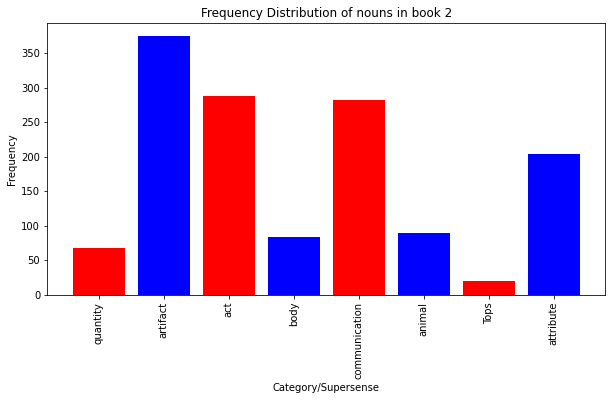

<Figure size 432x288 with 0 Axes>

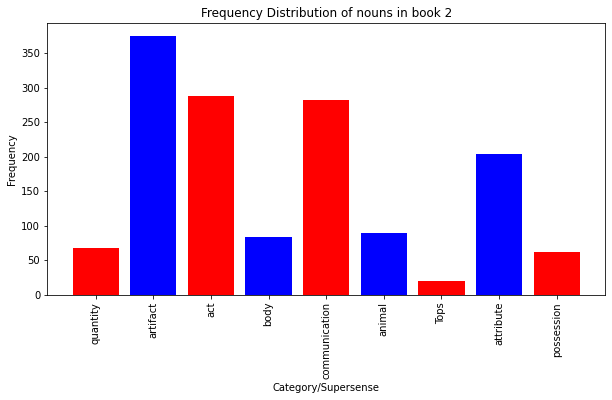

<Figure size 432x288 with 0 Axes>

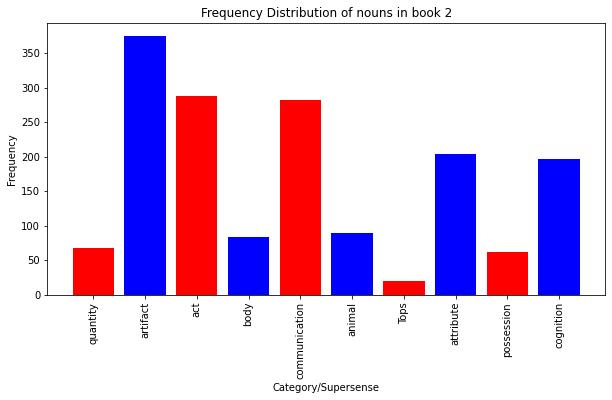

<Figure size 432x288 with 0 Axes>

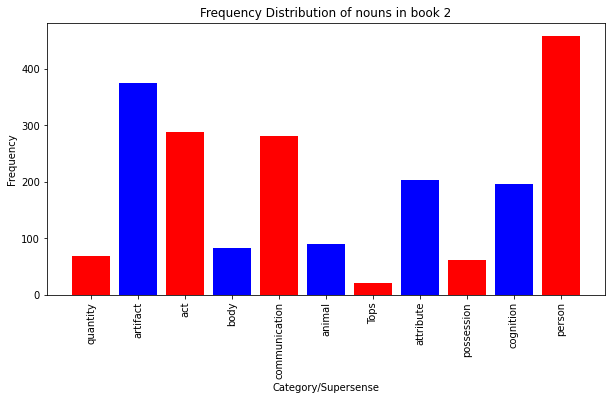

<Figure size 432x288 with 0 Axes>

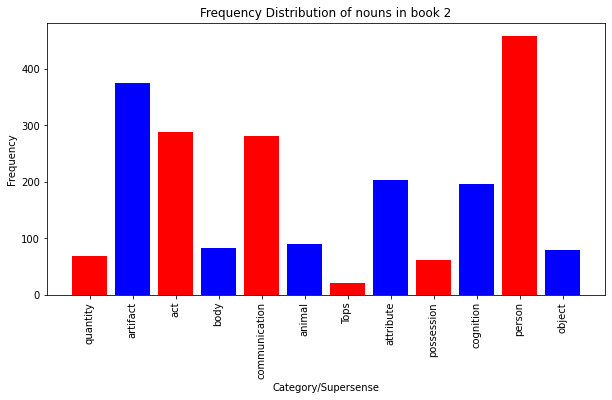

<Figure size 432x288 with 0 Axes>

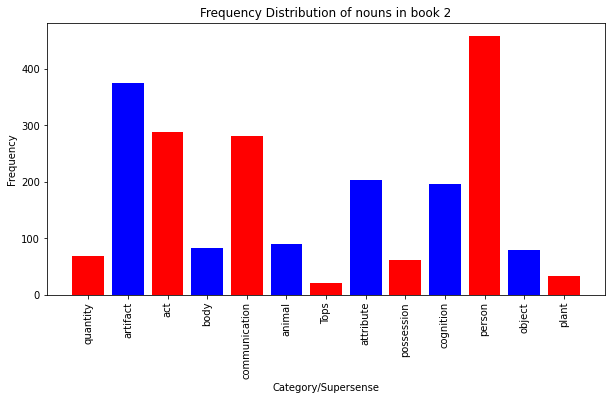

<Figure size 432x288 with 0 Axes>

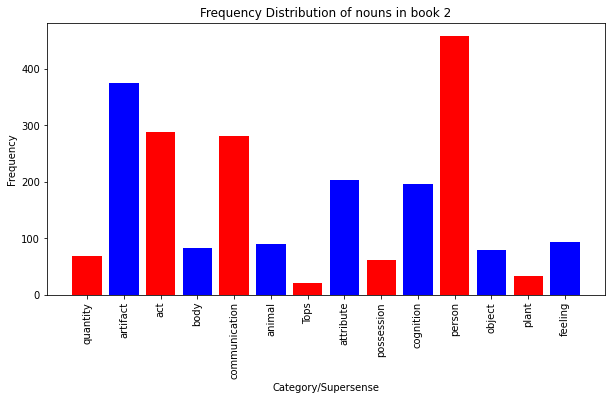

<Figure size 432x288 with 0 Axes>

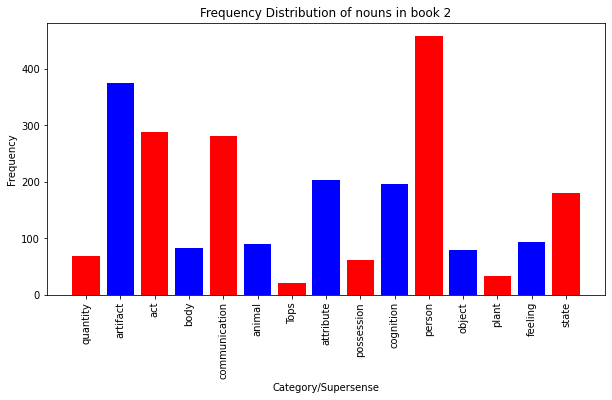

<Figure size 432x288 with 0 Axes>

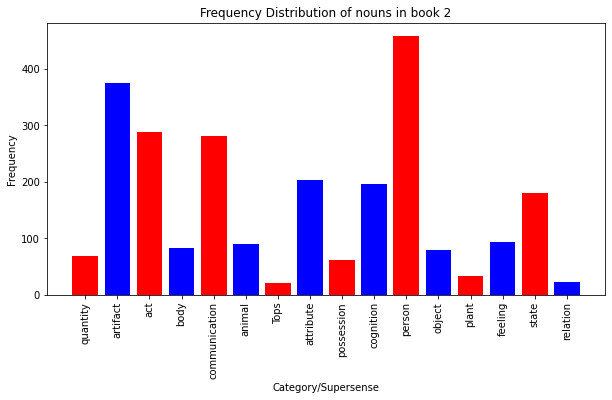

<Figure size 432x288 with 0 Axes>

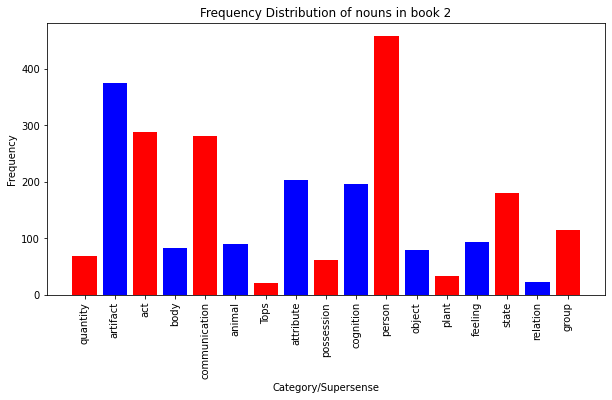

<Figure size 432x288 with 0 Axes>

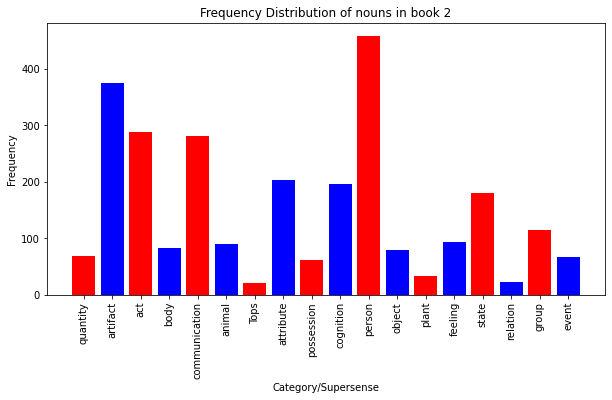

<Figure size 432x288 with 0 Axes>

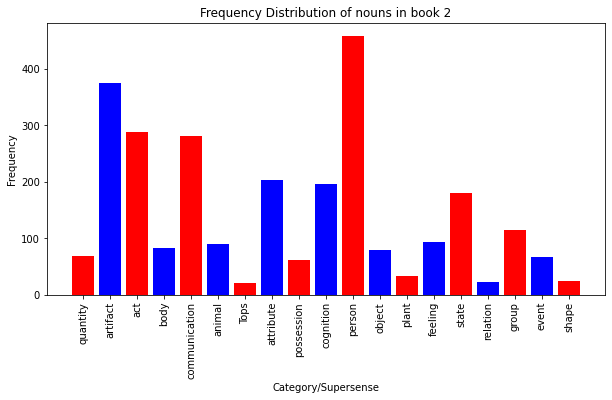

<Figure size 432x288 with 0 Axes>

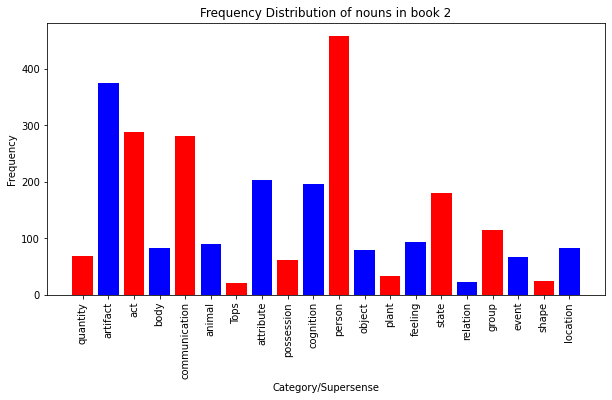

<Figure size 432x288 with 0 Axes>

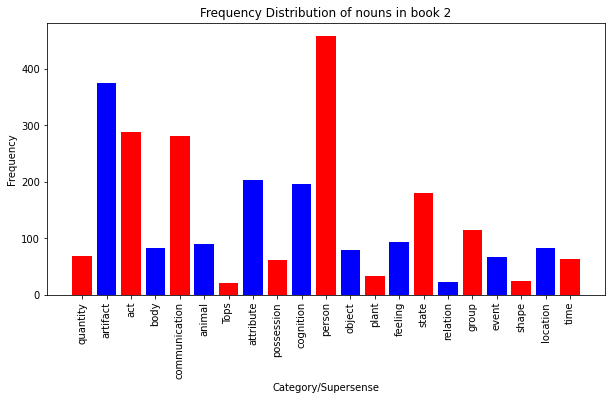

<Figure size 432x288 with 0 Axes>

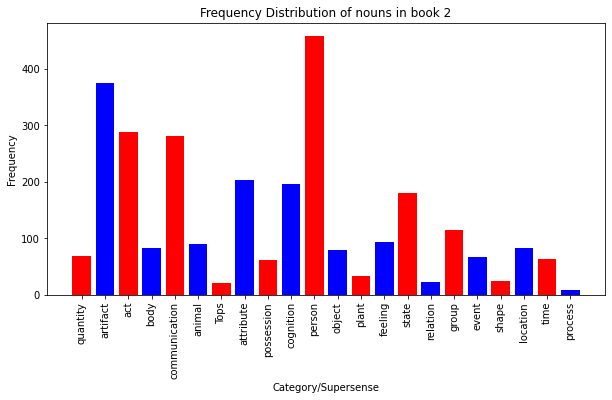

<Figure size 432x288 with 0 Axes>

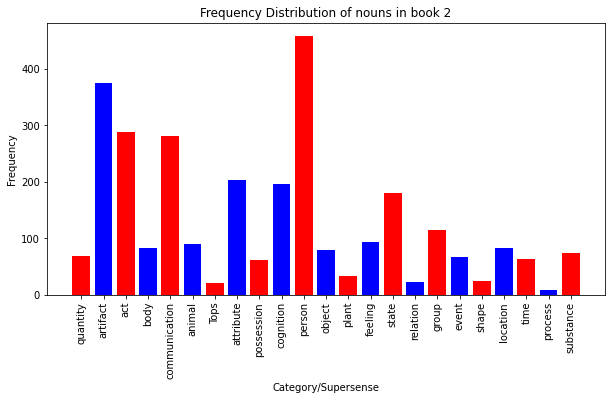

<Figure size 432x288 with 0 Axes>

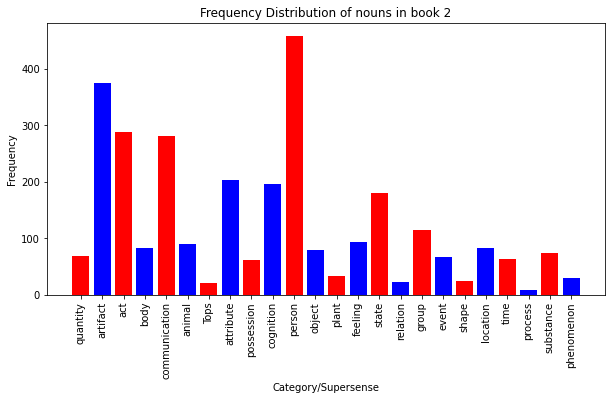

<Figure size 432x288 with 0 Axes>

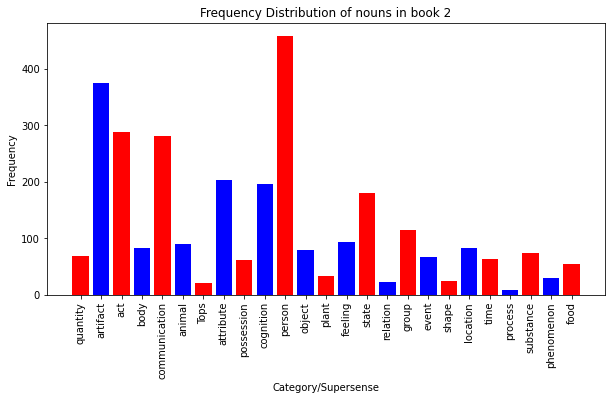

<Figure size 432x288 with 0 Axes>

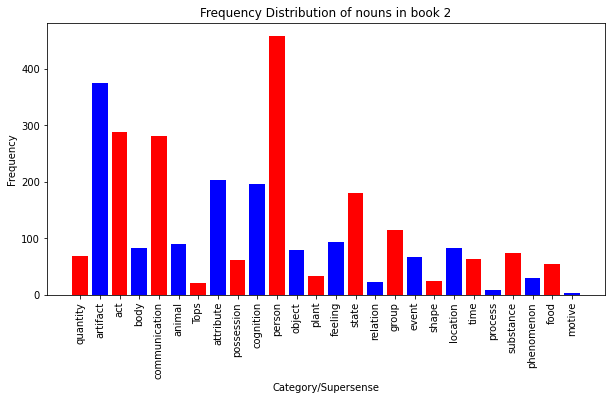

Plot for verbs of book-2:


<Figure size 432x288 with 0 Axes>

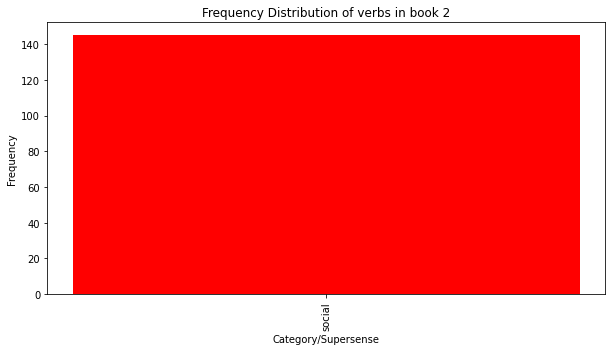

<Figure size 432x288 with 0 Axes>

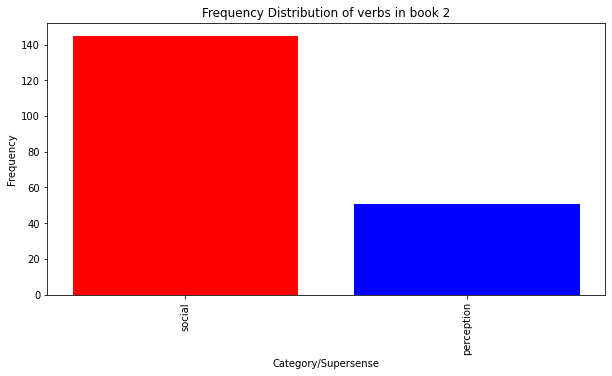

<Figure size 432x288 with 0 Axes>

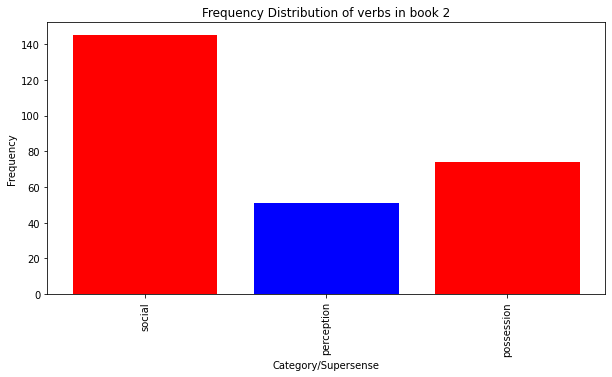

<Figure size 432x288 with 0 Axes>

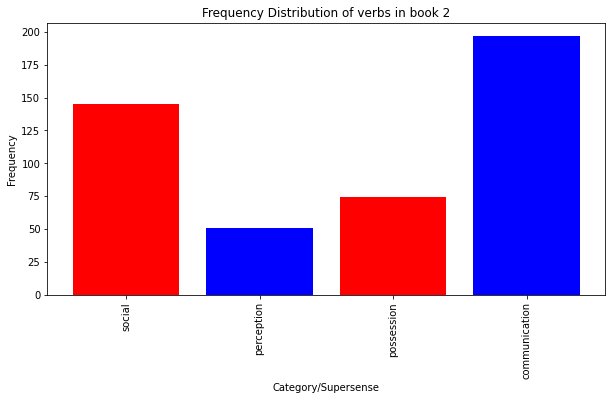

<Figure size 432x288 with 0 Axes>

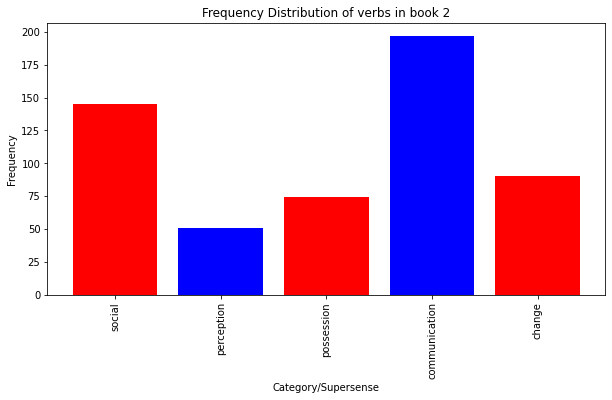

<Figure size 432x288 with 0 Axes>

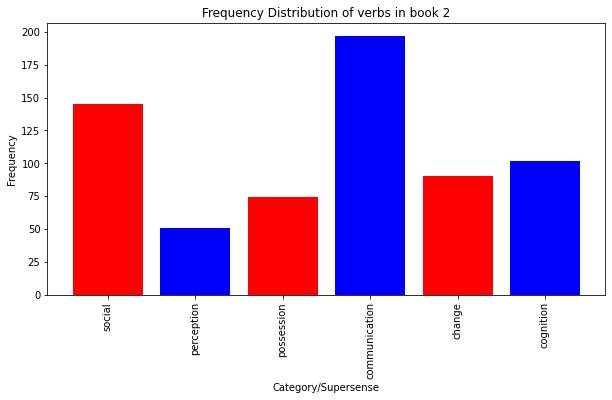

<Figure size 432x288 with 0 Axes>

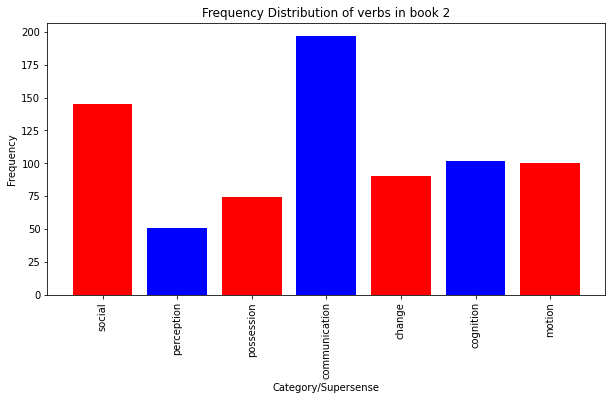

<Figure size 432x288 with 0 Axes>

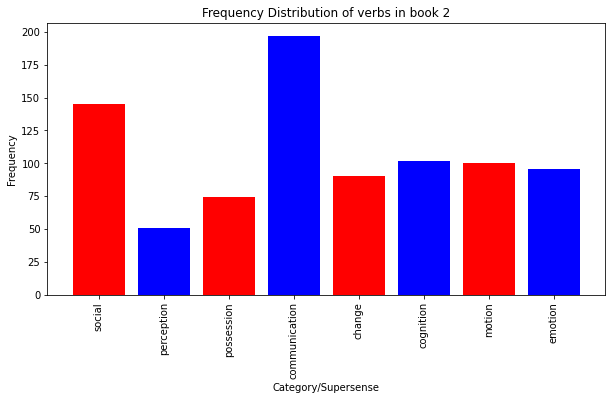

<Figure size 432x288 with 0 Axes>

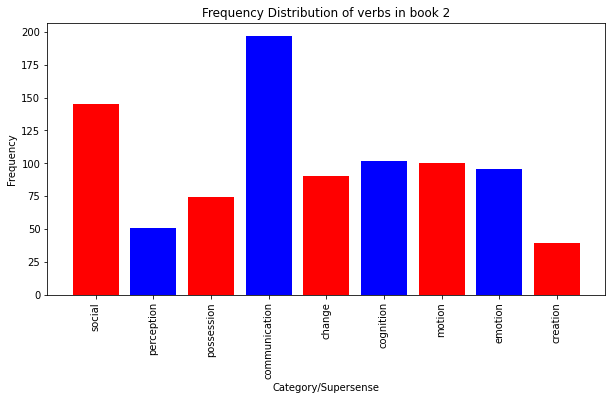

<Figure size 432x288 with 0 Axes>

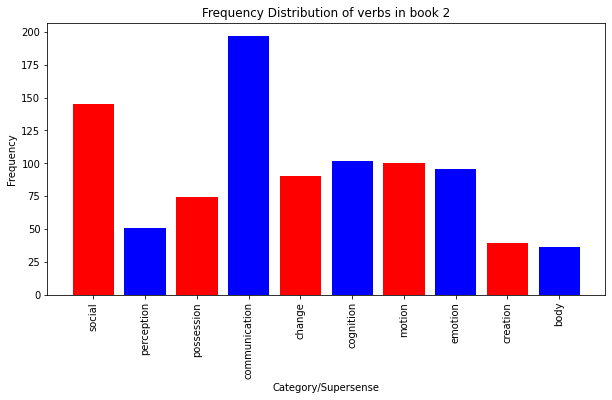

<Figure size 432x288 with 0 Axes>

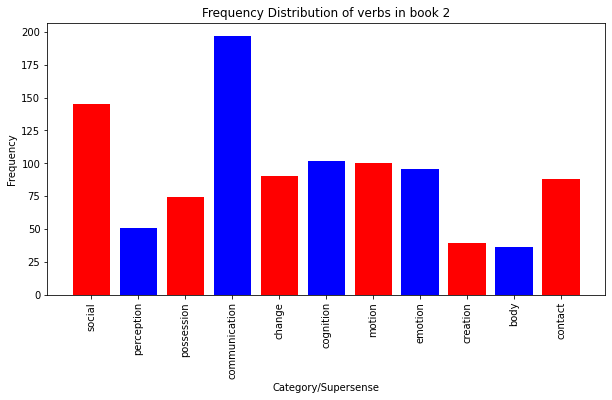

<Figure size 432x288 with 0 Axes>

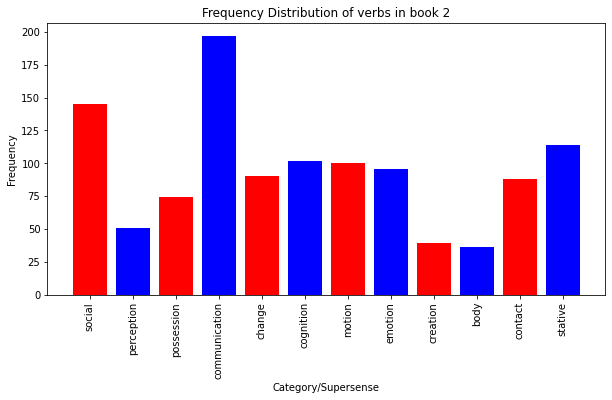

<Figure size 432x288 with 0 Axes>

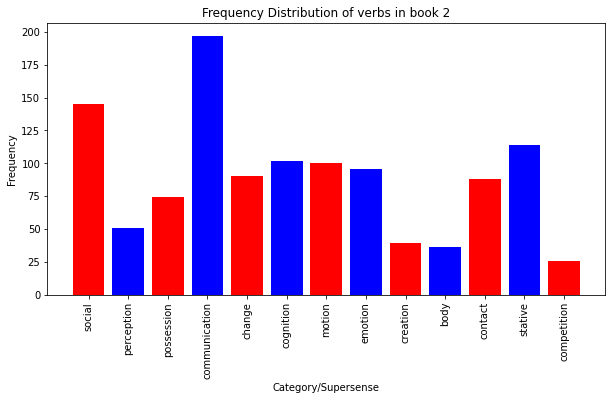

<Figure size 432x288 with 0 Axes>

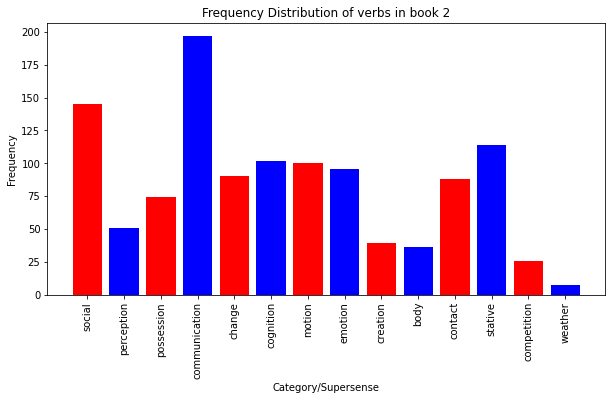

<Figure size 432x288 with 0 Axes>

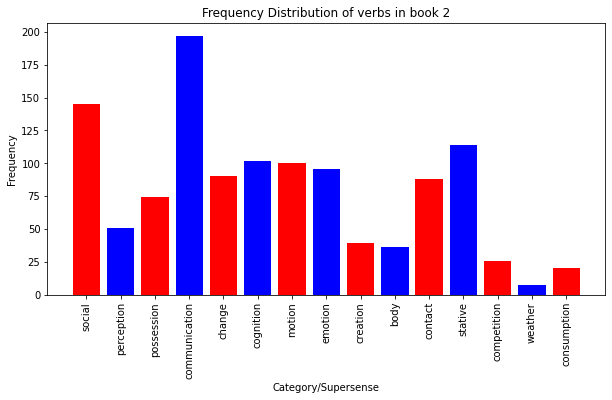

<Figure size 432x288 with 0 Axes>

In [19]:
print('Finding the category of each noun and verb using wordnet and plotting frequency distribution')

print('Plot for nouns of book-1:')
plotNoun(nouns1, 'Frequency Distribution of nouns in book 1')

print('Plot for verbs of book-1:')
plotVerb(verbs1, 'Frequency Distribution of verbs in book 1')

print('Plot for nouns of book-2:')
plotNoun(nouns2, 'Frequency Distribution of nouns in book 2')

print('Plot for verbs of book-2:')
plotVerb(verbs2, 'Frequency Distribution of verbs in book 2')